In [53]:
from datascience import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
fpath = "A:\\Git\\School\\DataScience\\Project\\Suicid\\archive\\who_suicide_statistics.csv"

In [2]:
test = Table.read_table(fpath)
test

country,year,sex,age,suicides_no,population
Albania,1985,female,15-24 years,nan,277900
Albania,1985,female,25-34 years,nan,246800
Albania,1985,female,35-54 years,nan,267500
Albania,1985,female,5-14 years,nan,298300
Albania,1985,female,55-74 years,nan,138700
Albania,1985,female,75+ years,nan,34200
Albania,1985,male,15-24 years,nan,301400
Albania,1985,male,25-34 years,nan,264200
Albania,1985,male,35-54 years,nan,296700
Albania,1985,male,5-14 years,nan,325800


In [3]:
# 1990년도부터
test=test.where('year', are.above_or_equal_to(1990))
test

country,year,sex,age,suicides_no,population
Albania,1990,female,15-24 years,nan,305900
Albania,1990,female,25-34 years,nan,278000
Albania,1990,female,35-54 years,nan,308300
Albania,1990,female,5-14 years,nan,329600
Albania,1990,female,55-74 years,nan,156400
Albania,1990,female,75+ years,nan,37600
Albania,1990,male,15-24 years,nan,325600
Albania,1990,male,25-34 years,nan,295100
Albania,1990,male,35-54 years,nan,337700
Albania,1990,male,5-14 years,nan,355600


In [3]:
# nan 제거
test=test.where('suicides_no', are.above_or_equal_to(0))
test=test.where('population', are.above_or_equal_to(0))
test

country,year,sex,age,suicides_no,population
Albania,1987,female,15-24 years,14,289700
Albania,1987,female,25-34 years,4,257200
Albania,1987,female,35-54 years,6,278800
Albania,1987,female,5-14 years,0,311000
Albania,1987,female,55-74 years,0,144600
Albania,1987,female,75+ years,1,35600
Albania,1987,male,15-24 years,21,312900
Albania,1987,male,25-34 years,9,274300
Albania,1987,male,35-54 years,16,308000
Albania,1987,male,5-14 years,0,338200


In [5]:
test

country,year,sex,age,suicides_no,population
Albania,1992,female,15-24 years,7,292400
Albania,1992,female,25-34 years,4,267400
Albania,1992,female,35-54 years,2,323100
Albania,1992,female,5-14 years,0,336700
Albania,1992,female,55-74 years,1,164900
Albania,1992,female,75+ years,0,38700
Albania,1992,male,15-24 years,9,263700
Albania,1992,male,25-34 years,7,245500
Albania,1992,male,35-54 years,12,343800
Albania,1992,male,5-14 years,0,362900


In [4]:
# 전체 데이터에서 자살 비율 상위 5개 국가
suicide_sum=test.group(['country', 'year', 'age'], np.sum).select(4,5)
test_nosex=test.group(['country', 'year', 'age'], np.sum).drop('sex sum')

In [6]:
test_nosex

country,year,age,suicides_no sum,population sum
Albania,1992,15-24 years,16,556100
Albania,1992,25-34 years,11,512900
Albania,1992,35-54 years,14,666900
Albania,1992,5-14 years,0,699600
Albania,1992,55-74 years,6,324400
Albania,1992,75+ years,0,62600
Albania,1993,15-24 years,28,528600
Albania,1993,25-34 years,16,491900
Albania,1993,35-54 years,17,681500
Albania,1993,5-14 years,2,707300


In [5]:
test_nosex=test_nosex.relabeled('population sum', 'population').relabeled('suicides_no sum', 'suicides no')
test_nosex

country,year,age,suicides no,population
Albania,1987,15-24 years,35,602600
Albania,1987,25-34 years,13,531500
Albania,1987,35-54 years,22,586800
Albania,1987,5-14 years,0,649200
Albania,1987,55-74 years,1,282100
Albania,1987,75+ years,2,57400
Albania,1988,15-24 years,25,614800
Albania,1988,25-34 years,10,542300
Albania,1988,35-54 years,18,598600
Albania,1988,5-14 years,0,662200


In [ ]:
test_nosex['population']/=1000

In [8]:
test_nosex.with_column('percentage', test_nosex['suicides no']/test_nosex['population']*100).sort('percentage', descending=True)

country,year,age,suicides no,population,percentage
Hungary,1981,75+ years,662,494600,0.133846
Hungary,1980,75+ years,639,488000,0.130943
Hungary,1979,75+ years,606,473600,0.127956
French Guiana,1979,75+ years,1,800,0.125
Hungary,1984,75+ years,656,526200,0.124667
Hungary,1982,75+ years,620,504100,0.122991
Aruba,2000,75+ years,3,2488,0.120579
Hungary,1985,75+ years,646,539000,0.119852
Hungary,1986,75+ years,653,550100,0.118706
Hungary,1990,75+ years,668,569794,0.117235


In [8]:
test_nosex

country,year,age,suicides no,population,percentage
Aruba,2000,75+ years,3,2.488e+06,0.000120579
Hungary,1990,75+ years,668,5.69794e+08,0.000117235
San Marino,1997,75+ years,2,1.714e+06,0.000116686
Republic of Korea,2009,75+ years,1926,1.7701e+09,0.000108808
Republic of Korea,2010,75+ years,2066,1.90687e+09,0.000108345
Republic of Korea,2004,75+ years,1417,1.30877e+09,0.00010827
Hungary,1991,75+ years,596,5.51274e+08,0.000108113
Republic of Korea,2005,75+ years,1480,1.38524e+09,0.00010684
Republic of Korea,2011,75+ years,2170,2.04917e+09,0.000105896
Republic of Korea,2007,75+ years,1603,1.55028e+09,0.000103401


In [9]:
test_nosex.relabeled('population', '총 인구(단위 : 천명)').relabeled('suicides no', '자살수').relabeled('percentage', '10만명 당 자살수')

country,year,age,자살수,총 인구(단위 : 천명),10만명 당 자살수
Aruba,2000,75+ years,3,2.488e+06,0.000120579
Hungary,1990,75+ years,668,5.69794e+08,0.000117235
San Marino,1997,75+ years,2,1.714e+06,0.000116686
Republic of Korea,2009,75+ years,1926,1.7701e+09,0.000108808
Republic of Korea,2010,75+ years,2066,1.90687e+09,0.000108345
Republic of Korea,2004,75+ years,1417,1.30877e+09,0.00010827
Hungary,1991,75+ years,596,5.51274e+08,0.000108113
Republic of Korea,2005,75+ years,1480,1.38524e+09,0.00010684
Republic of Korea,2011,75+ years,2170,2.04917e+09,0.000105896
Republic of Korea,2007,75+ years,1603,1.55028e+09,0.000103401


In [9]:
test

country,year,sex,age,suicides_no,population
Albania,1987,female,15-24 years,14,289700
Albania,1987,female,25-34 years,4,257200
Albania,1987,female,35-54 years,6,278800
Albania,1987,female,5-14 years,0,311000
Albania,1987,female,55-74 years,0,144600
Albania,1987,female,75+ years,1,35600
Albania,1987,male,15-24 years,21,312900
Albania,1987,male,25-34 years,9,274300
Albania,1987,male,35-54 years,16,308000
Albania,1987,male,5-14 years,0,338200


In [37]:
korea=test.where('country', 'Republic of Korea').group(['year', 'age'], np.sum).drop(2,3)
korea

year,age,suicides_no sum,population sum
1985,15-24 years,974,8.5613e+06
1985,25-34 years,883,7.1856e+06
1985,35-54 years,1165,8.5531e+06
1985,5-14 years,33,8.3924e+06
1985,55-74 years,554,3.4988e+06
1985,75+ years,80,525500
1986,15-24 years,853,8.744e+06
1986,25-34 years,921,7.4891e+06
1986,35-54 years,1063,8.8333e+06
1986,5-14 years,26,8.3401e+06


In [38]:
korea['population sum']/=1000

In [39]:
korea=korea.relabeled('population sum', 'population(unit : 1000)')
korea

year,age,suicides_no sum,population(unit : 1000)
1985,15-24 years,974,8561.3
1985,25-34 years,883,7185.6
1985,35-54 years,1165,8553.1
1985,5-14 years,33,8392.4
1985,55-74 years,554,3498.8
1985,75+ years,80,525.5
1986,15-24 years,853,8744
1986,25-34 years,921,7489.1
1986,35-54 years,1063,8833.3
1986,5-14 years,26,8340.1


In [40]:
korea=korea.relabeled('suicides_no sum', 'suicides num')

In [41]:
korea=korea.with_column('per', 
                (korea['suicides num']/1000)/korea['population(unit : 1000)']*100)
korea

year,age,suicides num,population(unit : 1000),per
1985,15-24 years,974,8561.3,0.0113768
1985,25-34 years,883,7185.6,0.0122885
1985,35-54 years,1165,8553.1,0.0136208
1985,5-14 years,33,8392.4,0.000393213
1985,55-74 years,554,3498.8,0.015834
1985,75+ years,80,525.5,0.0152236
1986,15-24 years,853,8744,0.00975526
1986,25-34 years,921,7489.1,0.0122979
1986,35-54 years,1063,8833.3,0.012034
1986,5-14 years,26,8340.1,0.000311747


In [42]:
korea=korea.where('age', are.not_equal_to('55-74 years')).where('age', are.not_equal_to('75+ years'))

In [43]:
korea

year,age,suicides num,population(unit : 1000),per
1985,15-24 years,974,8561.3,0.0113768
1985,25-34 years,883,7185.6,0.0122885
1985,35-54 years,1165,8553.1,0.0136208
1985,5-14 years,33,8392.4,0.000393213
1986,15-24 years,853,8744,0.00975526
1986,25-34 years,921,7489.1,0.0122979
1986,35-54 years,1063,8833.3,0.012034
1986,5-14 years,26,8340.1,0.000311747
1987,15-24 years,714,8801.5,0.00811225
1987,25-34 years,929,7787.7,0.0119291


AttributeError: module 'collections' has no attribute 'Iterable'

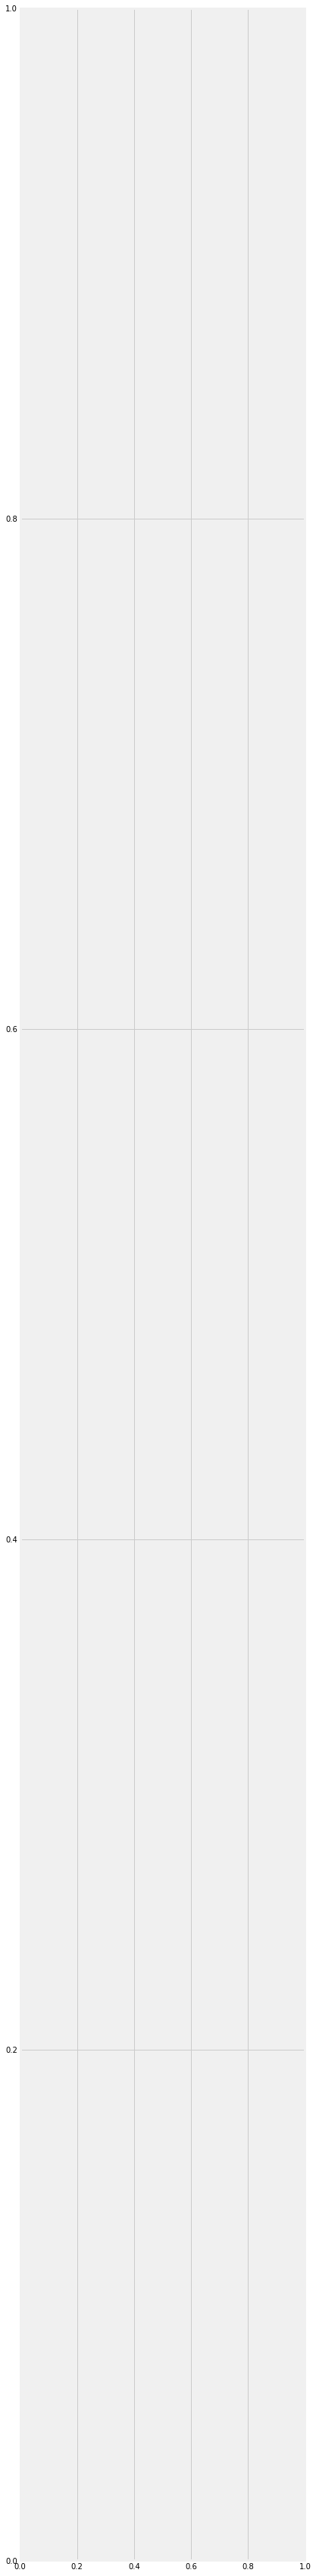

In [56]:
%matplotlib inline
korea.select('year','per').barh('year')